![](http://osloyi5le.bkt.clouddn.com/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%B7%A5%E7%A8%8B%E5%B8%88banner.png)

# 波士顿房价-连续类型特征数据的回归问题-构建回归树-决策树
>张子豪 同济大学研究生 2019-05-15

## 0.import工具库

In [53]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_boston

## 1.加载数据，认识数据集

In [54]:
boston_house = load_boston()

In [55]:
dir(boston_house)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [56]:
boston_house.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [57]:
boston_house.data[0:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [58]:
len(boston_house.data)

506

In [59]:
boston_house.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [60]:
len(boston_house.target)

506

print(boston_house.DESCR)

In [61]:
boston_feature_name = boston_house.feature_names
boston_features = boston_house.data
boston_target = boston_house.target

In [62]:
boston_feature_name

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [63]:
print(boston_house.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [64]:
boston_features[:5,:]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [65]:
boston_target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### 构建模型

In [66]:
rgs = tree.DecisionTreeRegressor(max_depth=4)
rgs = rgs.fit(boston_features, boston_target)

In [67]:
rgs

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [68]:
import pydotplus
from IPython.display import Image, display

In [69]:
dot_data = tree.export_graphviz(rgs,
                                out_file = None,
                                feature_names = boston_feature_name,
                                class_names = boston_target,
                                filled = True,
                                rounded = True
                               )

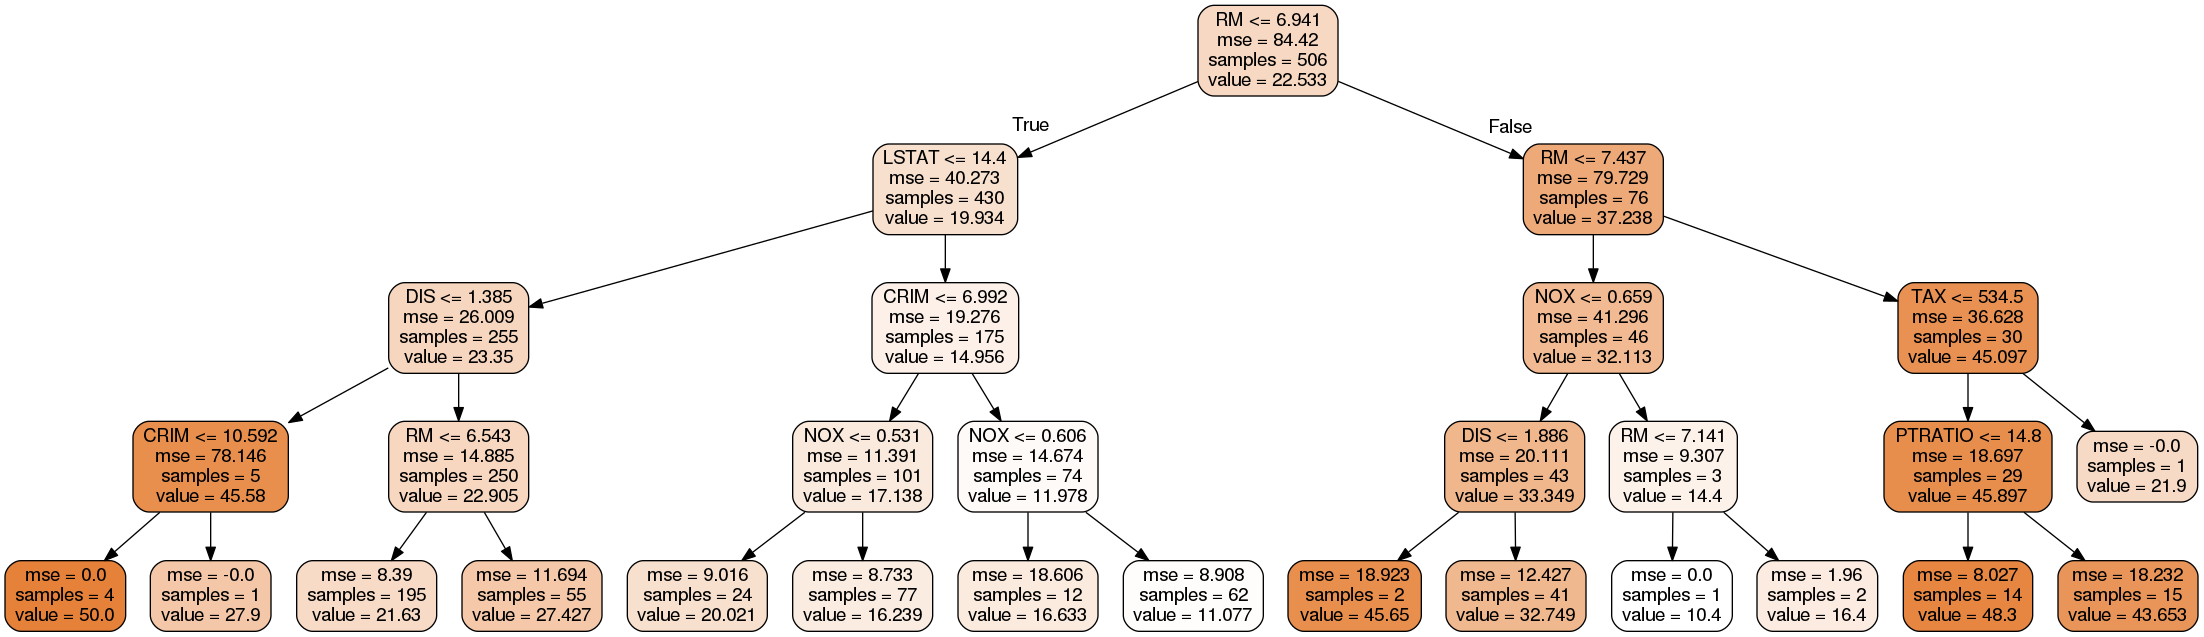

In [70]:
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

## 预测新样本

In [71]:
a1 = boston_features[0]

In [72]:
rgs.predict(a1.reshape(1,-1))

array([27.42727273])

In [73]:
a2 = boston_features[1]
a3 = boston_features[2]

In [74]:
import numpy as np
b =np.row_stack((a1,a2,a3))

In [75]:
rgs.predict(b)

array([27.42727273, 21.62974359, 32.74878049])

In [76]:
a1

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [77]:
a4 = np.array([0.000e+00, 5.000e+01, 2.310e+00, 0.000e+00, 0.580e-01, 9.075e+00,
       6.520e+01, 1.090e+01, 1.000e+00, 2.960e+02, 15.30e+02, 0.969e+02,
       4.980e+00])

In [78]:
rgs.predict(a4.reshape(1,-1))

array([43.65333333])

In [79]:
rgs.predict(boston_features)

array([27.42727273, 21.62974359, 32.74878049, 32.74878049, 32.74878049,
       21.62974359, 21.62974359, 20.02083333, 20.02083333, 20.02083333,
       20.02083333, 21.62974359, 20.02083333, 21.62974359, 21.62974359,
       21.62974359, 21.62974359, 16.23896104, 21.62974359, 21.62974359,
       16.23896104, 21.62974359, 16.23896104, 16.23896104, 16.23896104,
       16.23896104, 16.23896104, 16.23896104, 21.62974359, 27.42727273,
       16.23896104, 21.62974359, 16.23896104, 16.23896104, 16.23896104,
       21.62974359, 21.62974359, 21.62974359, 21.62974359, 27.42727273,
       32.74878049, 27.42727273, 21.62974359, 21.62974359, 21.62974359,
       21.62974359, 21.62974359, 20.02083333, 20.02083333, 20.02083333,
       21.62974359, 21.62974359, 21.62974359, 21.62974359, 20.02083333,
       32.74878049, 21.62974359, 27.42727273, 21.62974359, 21.62974359,
       21.62974359, 20.02083333, 21.62974359, 27.42727273, 32.74878049,
       21.62974359, 21.62974359, 21.62974359, 21.62974359, 21.62

# 波士顿房价预测-随机森林算法-回归

In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

In [3]:
boston_house = load_boston()

In [5]:
boston_feature_name = boston_house.feature_names
boston_features = boston_house.data
boston_target = boston_house.target

In [6]:
boston_feature_name

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble.forest:

class RandomForestRegressor(ForestRegressor)
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=10)
 |      The number of trees in the forest.
 |  
 |      .. versionchanged:: 0.20
 |         The default value of ``n_estimators`` will change from 10 in
 |         version 0.20 to 100 in version 0.22.
 |  
 |  criterion : string, optional (default="mse")
 |      The function to measure the quality of a split. Supported criteria
 |  

In [9]:
rgs = RandomForestRegressor(n_estimators=15)

In [10]:
rgs = rgs.fit(boston_features,boston_target)

In [11]:
rgs

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [13]:
rgs.predict(boston_features)[0:30]

array([25.64666667, 21.34      , 34.26      , 33.22666667, 35.8       ,
       26.86666667, 21.44666667, 22.4       , 16.39333333, 19.05333333,
       17.53333333, 20.        , 21.40666667, 20.25333333, 18.46      ,
       19.92666667, 22.86      , 17.72666667, 19.59333333, 18.58666667,
       13.98666667, 19.48      , 15.08      , 14.88666667, 15.54666667,
       14.31333333, 16.64      , 14.98666667, 18.71333333, 21.83333333])

# 普通回归树建模

In [14]:
from sklearn import tree

In [17]:
rgs2 = tree.DecisionTreeRegressor()

In [19]:
rgs2 = rgs2.fit(boston_features,boston_target)

In [20]:
rgs2

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [66]:
pr1 = rgs2.predict(boston_features)[0:50]

In [67]:
pr1

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4])

In [68]:
pr2 = rgs.predict(boston_features)[0:50]

In [69]:
pr2

array([25.64666667, 21.34      , 34.26      , 33.22666667, 35.8       ,
       26.86666667, 21.44666667, 22.4       , 16.39333333, 19.05333333,
       17.53333333, 20.        , 21.40666667, 20.25333333, 18.46      ,
       19.92666667, 22.86      , 17.72666667, 19.59333333, 18.58666667,
       13.98666667, 19.48      , 15.08      , 14.88666667, 15.54666667,
       14.31333333, 16.64      , 14.98666667, 18.71333333, 21.83333333,
       13.25333333, 16.00666667, 13.92666667, 14.26      , 14.08666667,
       19.40666667, 20.29333333, 20.93333333, 23.14666667, 29.69333333,
       35.34666667, 27.29333333, 24.42666667, 24.39333333, 21.22      ,
       19.38666667, 20.03333333, 17.70666667, 15.20666667, 19.76      ])

# 可视化比较随机森林和普通回归树的预测结果

In [70]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

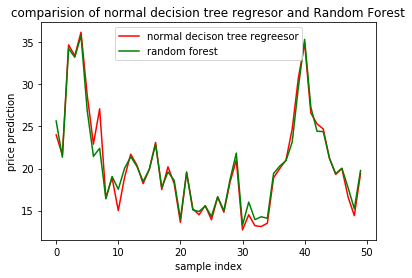

In [75]:
x = np.arange(50)
plt.plot(x,pr1,'r',label='normal decison tree regreesor')
plt.plot(x,pr2,'g',label="random forest")
plt.legend()
plt.xlabel('sample index')
plt.ylabel('price prediction')
plt.title('comparision of normal decision tree regresor and Random Forest')
plt.show()